In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import operator

from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from pyspark.sql.functions import *

nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/andra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
tweets = pd.read_csv("tweets.csv", sep = ";", error_bad_lines = False, encoding = 'utf8')
tweets = tweets.fillna(0)
tweets


,username,date,retweets,favorites,text,tokens,geo,location,mentions,hashtags,id,query,permalink,grade
0,NS_online,2017-01-17 18:21,0,0,"Oei, dat is balen Melcher! Sorry voor de verke...","['Oei', ',', 'dat', 'is', 'balen', 'Melcher', ...",0,Utrecht,0,0,8.213921e+17,NS AND vertraging,https://twitter.com/NS_online/status/821392093...,1.0
1,Arriva_NL,2017-12-11 16:14,0,0,Ik zie dat de voorgaande rit wel heeft gereden...,"['Ik', 'zie', 'dat', 'de', 'voorgaande', 'rit'...",0,Heerenveen,0,0,9.402233e+17,Arriva AND vertraging,https://twitter.com/Arriva_NL/status/940223278...,1.0
2,NS_online,2017-12-06 08:37,0,0,"Ah, oke! Dat was mij niet zo snel duidelijk. N...","['Ah', ',', 'oke', '!', 'Dat', 'was', 'mij', '...",0,Utrecht,0,0,9.382964e+17,storingen,https://twitter.com/NS_online/status/938296392...,0.0
3,Nyderwin,2017-01-12 08:21,0,0,zal de trein van 38 na op tijd rijden of zal d...,"['zal', 'de', 'trein', 'van', '38', 'na', 'op'...",0,belgium,0,0,8.194290e+17,vertraging AND trein,https://twitter.com/Nyderwin/status/8194290469...,0.0
4,RETRotterdam,2017-12-13 08:08,1,0,Actuele #RETverstoring #Bus143 Vervallen rit. ...,"['Actuele', '#', 'RETverstoring', '#', 'Bus143...",0,Rotterdam,0,#RETverstoring #Bus143,9.408256e+17,Overstappen OR Omleiding OR oponthoud,https://twitter.com/RETRotterdam/status/940825...,0.0
5,ElsVeenis,2017-01-17 17:00,0,0,"Na heenweg naar werk vol ontberingen (kou, ver...","['Na', 'heenweg', 'naar', 'werk', 'vol', 'ontb...",0,Ministerie OCW,0,#ns,8.213715e+17,NS AND vertraging,https://twitter.com/ElsVeenis/status/821371520...,1.0
6,waylay_test,2018-01-05 18:32,0,0,De trein van: Gent-Sint-Pieters om 17:25 naar ...,"['De', 'trein', 'van', ':', 'Gent-Sint-Pieters...","[51.0361237, 3.7109366]","Ghent, Belgium",0,#Blankenberge #Gent #trein #iRail,9.493178e+17,vertraging AND trein,https://twitter.com/waylay_test/status/9493177...,0.0
7,LeanderrJ,2017-12-15 19:42,0,1,Na drie keer overstappen de afgelopen 4 jaar w...,"['Na', 'drie', 'keer', 'overstappen', 'de', 'a...",0,0,0,0,9.417251e+17,Overstappen OR Omleiding OR oponthoud,https://twitter.com/LeanderrJ/status/941725131...,0.0
8,WilCornielje,2017-12-17 14:47,0,0,Ja @he_peter dat zie je goed. En vervolgens sn...,"['Ja', '@', 'he_peter', 'dat', 'zie', 'je', 'g...",0,0,@he_peter @fvdemocratie,#,9.423758e+17,Overstappen OR Omleiding OR oponthoud,https://twitter.com/WilCornielje/status/942375...,0.0
9,bdefrens,2017-12-09 18:55,0,0,"Oh, dat is mij ook een keer gebeurd! Ik moest ...","['Oh', ',', 'dat', 'is', 'mij', 'ook', 'een', ...",0,The Netherlands,0,0,9.395391e+17,vertraging AND trein,https://twitter.com/bdefrens/status/9395390608...,0.0


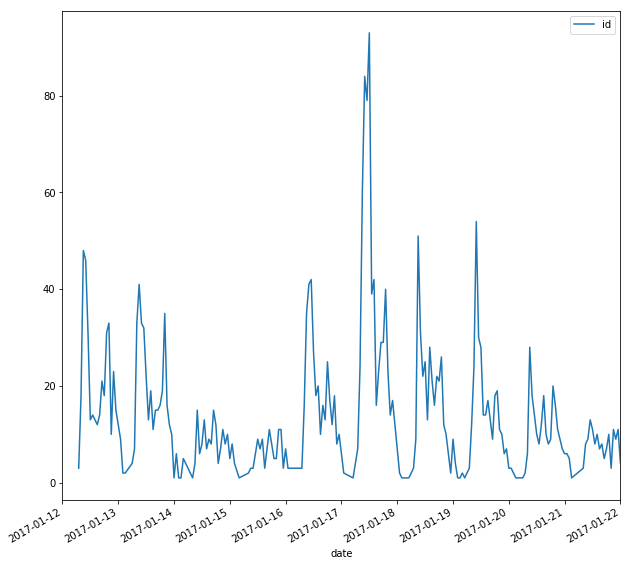

In [86]:
tweets["date"] = pd.to_datetime(tweets["date"])

dates = pd.DataFrame()
dates["id"] = tweets["id"]
dates["date"] = tweets["date"].dt.round('h')

dates.groupby(dates["date"]).count().plot(figsize = (10, 10))
ax = plt.subplot()
ax.set_xlim(pd.Timestamp('2017-01-12'), pd.Timestamp('2017-01-22'))
# ax.set_xlim(pd.Timestamp('2017-12-05'), pd.Timestamp('2017-12-18'))
# ax.set_xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2018-01-07'))
plt.show()
# dates


fig = ax.get_figure()
fig.tight_layout()
fig.savefig('/home/andra/Desktop/Web Science/WSE_FinalPaper/chart', dpi=500)

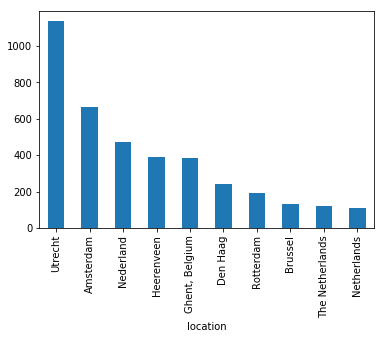

In [84]:
tweets['location'] = tweets['location'].str.strip()
tweets_loc = tweets.groupby(tweets.location).count()['id'].sort_values(ascending=False)
# tweets_loc
chart = tweets_loc.iloc[0:10].plot(kind='bar')
plt.show()
# df.groupby([df.created_at.dt.month,'product_version']).count()['Id'].reset_index(1)

fig = chart.get_figure()
fig.tight_layout()
fig.savefig('/home/andra/Desktop/Web Science/WSE_FinalPaper/location', dpi=350)

In [77]:
# tokenized_sents = [word_tokenize(i["text"]) for i in tweets]

# tweets['text'].apply(word_tokenize)

# tweets.apply(lambda row: word_tokenize(row['text']))
# def robust_encode(bs):
#     try:
#         return bs.encode('utf8')
#     except UnicodeEncodeError:
#         return ''
# tweets.apply(lambda row: word_tokenize(row['text']), axis=1, ignore_failures = True)

In [47]:
common_words_file = open('common_words.txt')
common_words = common_words_file.read().split(',')
# common_words

In [51]:
occ = {}
def countOcc(words):
    for word in words[1:-1].split(','):
        word = word.strip()[1:-1].encode('utf8').lower()
        if word not in common_words:
            if word not in occ:
                occ[word] = 1
            else:
                occ[word] += 1

In [52]:
a = tweets.apply(lambda row: countOcc(row['tokens']), axis=1)
# tweets.apply(lambda row: print(row['tokens']), axis=1)

sorted_x = sorted(occ.items(), key=operator.itemgetter(1), reverse=True)
sorted_x

[('minuten', 1227),
 ('rijden', 640),
 ('uur', 610),
 ('rijdt', 565),
 ('bus', 544),
 ('rekening', 434),
 ('gent', 420),
 ('tram', 412),
 ('irail', 383),
 ('over', 360),
 ('was', 358),
 ('terug', 349),
 ('geld', 339),
 ('treinen', 336),
 ('min', 335),
 ('helaas', 334),
 ('had', 323),
 ('1/2', 319),
 ('richting', 317),
 ('2', 316),
 ('gent-sint-pieters', 306),
 ('tijd', 296),
 ('hier', 291),
 ('excuses', 275),
 ('1', 268),
 ('vandaag', 257),
 ('10', 247),
 ('dienstregeling', 245),
 ('5', 242),
 ('dag', 239),
 ('gaan', 237),
 ('hoi', 236),
 ('moeten', 234),
 ('vanaf', 233),
 ('tussen', 232),
 ('wachten', 231),
 ('even', 229),
 ('info', 222),
 ('daar', 220),
 ('eens', 219),
 ('doen', 217),
 ('station', 217),
 ('waar', 214),
 ('inderdaad', 212),
 ('ga', 212),
 ('worden', 210),
 ('storing', 209),
 ('3', 208),
 ('keer', 207),
 ('volgens', 206),
 ('nmbs', 205),
 ('lijn', 203),
 ('30', 201),
 ('zit', 197),
 ('laat', 197),
 ('kunt', 194),
 ('utrecht', 193),
 ('omdat', 192),
 ('zonder', 191),
 (

TypeError: 'str' object is not callable

In [53]:
all_text = ""
for word in sorted_x:
    if int(word[1]) > 50:
        for i in range(int(word[1])):
            all_text += word[0] + " "


In [56]:
# text = ""
# with open("most_common.txt") as f:
#     lines = f.readlines()
# for l in lines:
#     line = l.split(" ")
#     for i in range(int(line[0])):
#         text += line[1][:-1] + " "
        
wordCloud = WordCloud(width=2000, height=1000, background_color='white').generate(all_text).to_file("word_cloud2.png")
# wordCloud = WordCloud(width=2000, height=1000, background_color='white').generate(tweets_loc).to_file("word_cloud3.png")

In [92]:
df = sqlContext.read.csv('tweets.csv', sep = ';', header = True, inferSchema = True)
sqlContext.registerDataFrameAsTable(df, 'tweets')
#df.printSchema()
#df.toPandas()
disr = sqlContext.read.csv('disruption_grade.csv', sep = ';', header = True, inferSchema = True)

round_date = (round(unix_timestamp(col('date'), format='yyyy-MM-dd HH:mm') / 3600) * 3600).cast('integer')

df = df.withColumn('round_date', round_date)

pd.set_option('display.max_colwidth', -1)
df.select('text').where('grade is null').toPandas()

,text


In [93]:
mldf = df.select(['round_date', 'grade']).groupby(['round_date', 'grade']).count().orderBy('round_date')
mldf = mldf.withColumn('hour', hour(from_unixtime('round_date')))
mldf.toPandas()

,round_date,grade,count,hour
0,1484197200,0,3,7
1,1484200800,0,18,8
2,1484204400,0,48,9
3,1484208000,0,45,10
4,1484211600,0,32,11
5,1484215200,0,13,12
6,1484218800,0,14,13
7,1484222400,0,13,14
8,1484226000,0,12,15
9,1484229600,0,13,16


In [94]:
hashtags = {}
def insertToDict(element):
    if element in hashtags:
        hashtags[element] += 1
    else:
        hashtags[element] = 1

In [ ]:
hashtags_string = df.select('hashtags').where('hashtags is not null').toPandas()['hashtags'].tolist()
hashtags = {}
for hashtag in hashtags_string:
    tokens = nltk.word_tokenize(hashtag)
    filteredTokens = []
    for token in tokens:
        token = token.encode('utf8').lower()
        if len(token) > 1:
            insertToDict(token)
hashtags = sorted(hashtags.items(), key=operator.itemgetter(1), reverse=True)
hashtags

[('trein', 418),
 ('gent', 385),
 ('irail', 383),
 ('ns', 227),
 ('overstappen', 161),
 ('retverstoring', 122),
 ('vertraging', 101),
 ('toon', 86),
 ('blankenberge', 81),
 ('zorgverzekering', 78),
 ('oostende', 78),
 ('treinleven', 75),
 ('antwerp', 70),
 ('besparen', 70),
 ('vacature', 57),
 ('eneco', 56),
 ('fail', 55),
 ('sneeuw', 55),
 ('kpn', 49),
 ('energie', 48),
 ('lab', 44),
 ('storing', 44),
 ('xs4all', 40),
 ('nmbs', 39),
 ('provider', 35),
 ('kkl', 33),
 ('kortrijk', 33),
 ('tdd', 33),
 ('zorg', 33),
 ('geld', 33),
 ('slechteklantenservice', 30),
 ('zorgpremie', 29),
 ('amsterdam', 26),
 ('de', 25),
 ('klacht', 23),
 ('stroomstoring', 22),
 ('trapernietin', 22),
 ('storingen', 19),
 ('tram8', 17),
 ('knokke', 17),
 ('a27', 17),
 ('ziggo', 17),
 ('omleiding', 17),
 ('amersfoort', 16),
 ('tram4', 14),
 ('coderood', 14),
 ('a4', 13),
 ('nieuws', 13),
 ('mivb', 13),
 ('delijn', 12),
 ('tram7', 12),
 ('prorail', 12),
 ('winterweer', 12),
 ('rotterdam', 12),
 ('10daagse', 11),
 

In [38]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

features = ['count', 'hour']
vect = VectorAssembler(inputCols = features, outputCol = 'features')
pipeline = Pipeline(stages = [vect])
data = pipeline.fit(mldf).transform(mldf).cache()
(training, test) = data.randomSplit([0.6, 0.4], seed = 42)
print training.count()

305


In [16]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

def evaluate(test, prediction):
    ev = MulticlassClassificationEvaluator(labelCol = 'grade', predictionCol = 'prediction')
    print '%f' % ev.evaluate(prediction)

In [42]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

def evaluate(test, prediction):
    ev = BinaryClassificationEvaluator(labelCol = 'grade', rawPredictionCol = 'rawPrediction')
    print '%f' % ev.evaluate(prediction)

In [43]:
from pyspark.ml.classification import RandomForestClassifier as rfc

result = rfc(labelCol = 'grade', featuresCol = 'features', numTrees = 100, maxDepth = 5)
model = result.fit(training)
evaluate(test, model.transform(test))

0.706086


In [37]:
predictions = model.transform(data)

predictions.toPandas()

# plot de predictions.grade si predictions.prediction 

,round_date,grade,count,hour,features,rawPrediction,probability,prediction
0,1512432000,1,2,2,"[2.0, 2.0]","[0.0, 23.6652948256, 17.7378517998, 8.59685337...","[0.0, 0.473305896511, 0.354757035995, 0.171937...",1.0
1,1512435600,1,1,3,"[1.0, 3.0]","[0.0, 23.4135475598, 10.9171302995, 15.6693221...","[0.0, 0.468270951196, 0.218342605989, 0.313386...",1.0
2,1512439200,1,1,4,"[1.0, 4.0]","[0.0, 22.181762678, 11.4927297001, 16.3255076219]","[0.0, 0.44363525356, 0.229854594001, 0.3265101...",1.0
3,1512442800,1,1,5,"[1.0, 5.0]","[0.0, 18.1064220182, 12.2137732723, 19.6798047...","[0.0, 0.362128440364, 0.244275465445, 0.393596...",3.0
4,1512453600,1,12,8,"[12.0, 8.0]","[0.0, 25.1227746048, 17.2706576171, 7.6065677781]","[0.0, 0.502455492097, 0.345413152341, 0.152131...",1.0
5,1512457200,1,22,9,"[22.0, 9.0]","[0.0, 30.2316699368, 13.0202599802, 6.74807008...","[0.0, 0.604633398735, 0.260405199604, 0.134961...",1.0
6,1512460800,1,29,10,"[29.0, 10.0]","[0.0, 29.9568896475, 15.3084357724, 4.7346745801]","[0.0, 0.59913779295, 0.306168715448, 0.0946934...",1.0
7,1512464400,1,19,11,"[19.0, 11.0]","[0.0, 33.4242503287, 12.8998349706, 3.67591470...","[0.0, 0.668485006574, 0.257996699412, 0.073518...",1.0
8,1512468000,1,14,12,"[14.0, 12.0]","[0.0, 33.8312330447, 11.5325532142, 4.6362137411]","[0.0, 0.676624660895, 0.230651064283, 0.092724...",1.0
9,1512471600,1,15,13,"[15.0, 13.0]","[0.0, 31.5054721802, 14.7663291455, 3.72819867...","[0.0, 0.630109443605, 0.295326582909, 0.074563...",1.0
